In [1]:
# loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# Load Dataset
df = pd.read_csv("Datathon_TrainData_org.csv")

In [3]:
df.head()

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Emotion,Context
0,Russia,24-01-2000,Vladimir Putin,Speech at a conference of the heads of republi...,"Esteemed Mr Lebedev,\n\nLadies and Gentlemen:\...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,UPSET,OTHERS
1,USA,09-09-2021 00:00,Joe Biden,Remarks by President Biden on Fighting the COV...,"THE PRESIDENT: Good evening, my fellow Americ...",President,Joe Biden,https://www.whitehouse.gov/briefing-room/speec...,OPTIMISM,DEVELOPMENT
2,Russia,24-12-2004,Vladimir Putin,Excerpts from the Opening Speech at a Session ...,"Good afternoon, dear colleagues,\n\nOur meetin...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,NEUTRAL,DEVELOPMENT
3,USA,14-08-2014,Barack Obama,\nStatement by the President,"Good afternoon, everybody. This sound system i...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NEUTRAL,INTERNATIONAL AFFAIRS
4,USA,26-03-2021 00:00,Joe Biden,Statement by President Biden on the Attack on ...,More Americans voted in the 2020 elections tha...,President,Joe Biden,https://www.whitehouse.gov/briefing-room/speec...,UPSET,OTHERS


In [4]:
# Value Counts
df['Emotion'].value_counts()

NEUTRAL     477
OPTIMISM    467
JOY         422
UPSET       239
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

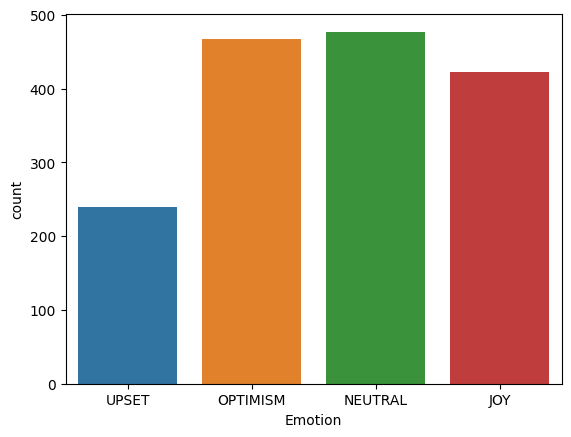

In [5]:
# Plot
sns.countplot(x='Emotion',data=df)

In [6]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [8]:
indices = df[df.isnull().any(axis=1)].index
df = df.drop(indices)

# Reset the index
df = df.reset_index(drop=True)

In [9]:
# User handles
df['Clean_Text'] = df['Text_of_Speech'].apply(nfx.remove_userhandles)

In [10]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [11]:
df

,Country,Date,Speaker,Headline,Text_of_Speech,Designation,Running President/PM,Speech Link,Emotion,Context,Clean_Text
0,Russia,24-01-2000,Vladimir Putin,Speech at a conference of the heads of republi...,"Esteemed Mr Lebedev,\n\nLadies and Gentlemen:\...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,UPSET,OTHERS,"Esteemed Mr Lebedev, Ladies Gentlemen: gathere..."
1,USA,09-09-2021 00:00,Joe Biden,Remarks by President Biden on Fighting the COV...,"THE PRESIDENT: Good evening, my fellow Americ...",President,Joe Biden,https://www.whitehouse.gov/briefing-room/speec...,OPTIMISM,DEVELOPMENT,"PRESIDENT: Good evening, fellow Americans. wan..."
2,Russia,24-12-2004,Vladimir Putin,Excerpts from the Opening Speech at a Session ...,"Good afternoon, dear colleagues,\n\nOur meetin...",President,Vladimir Putin,http://en.kremlin.ru/events/president/transcri...,NEUTRAL,DEVELOPMENT,"Good afternoon, dear colleagues, meeting today..."
3,USA,14-08-2014,Barack Obama,\nStatement by the President,"Good afternoon, everybody. This sound system i...",President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NEUTRAL,INTERNATIONAL AFFAIRS,"Good afternoon, everybody. sound system powerf..."
4,USA,26-03-2021 00:00,Joe Biden,Statement by President Biden on the Attack on ...,More Americans voted in the 2020 elections tha...,President,Joe Biden,https://www.whitehouse.gov/briefing-room/speec...,UPSET,OTHERS,Americans voted 2020 elections election nation...
...,...,...,...,...,...,...,...,...,...,...,...
1600,United Kingdom,24-Jul-19,Boris Johnson,Boris Johnson's first speech as Prime Minister...,Good afternoon I have just been to see Her Maj...,Prime Minister,Boris Johnson,https://www.gov.uk/government/speeches/boris-j...,OPTIMISM,DEVELOPMENT,Good afternoon Majesty Queen invited form gove...
1601,USA,01-02-2021 00:00,Joe Biden,Statement by President Joe Biden On Black Hist...,"This February, during Black History Month, I c...",President,Joe Biden,https://www.whitehouse.gov/briefing-room/state...,OPTIMISM,OTHERS,"February, Black History Month, American people..."
1602,USA,30-09-2015,Barack Obama,\nRemarks by the President Meeting with State ...,Thank you so much. Everybody have a seat. We...,President,Barack Obama,https://obamawhitehouse.archives.gov/the-press...,NEUTRAL,NATIONALISM,"Thank much. Everybody seat. Well, welcome Whit..."
1603,China,23-06-2021 00:00,H.E. Wang Yi,Let Us Strengthen Confidence and Solidarity an...,"Colleagues,\nFriends,\n\nIn 2013, President Xi...",State Councilor and Foreign Minister of the Pe...,Xi Jinping,https://www.fmprc.gov.cn/mfa_eng/wjdt_665385/z...,JOY,DEVELOPMENT,"Colleagues, Friends, 2013, President Xi Jinpin..."


In [12]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [13]:
#  Spliting dataset
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [14]:
from sklearn.pipeline import Pipeline
pipe_line = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [15]:
# Train and Fit Data
pipe_line.fit(x_train,y_train)

C:\Users\kotla\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [16]:
pipe_line

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [17]:
# Check Accuracy
pipe_line.score(x_test,y_test)

0.491701244813278

In [18]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [19]:
pipe_line.predict([ex1])

array(['NEUTRAL'], dtype=object)

In [20]:
# Prediction Prob
pipe_line.predict_proba([ex1])

array([[0.28741036, 0.48126947, 0.08478747, 0.1465327 ]])

In [21]:
# To Know the classes
pipe_line.classes_

array(['JOY', 'NEUTRAL', 'OPTIMISM', 'UPSET'], dtype=object)

In [22]:
# Save Model & Pipeline
import joblib
pipeline_file = open("pickle_data.pkl","wb")
joblib.dump(pipe_line,pipeline_file)
pipeline_file.close()

In [44]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd

texts = df['Clean_Text'].tolist()
labels = df['Emotion'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_sequence_length = max(len(seq) for seq in sequences)

X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

label_to_index = {label: idx for idx, label in enumerate(set(labels))}
y = np.array([label_to_index[label] for label in labels])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(len(label_to_index), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.save("model.h5")

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

new_texts = ["I'm feeling really excited!", "This is a sad story."]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_X = pad_sequences(new_sequences, maxlen=max_sequence_length, padding='post')
predicted_labels = model.predict(new_X)
predicted_labels = [list(label_to_index.keys())[list(label_to_index.values()).index(np.argmax(label))] for label in predicted_labels]
print("Predicted Emotions:", predicted_labels)


Epoch 1/10
702/702 [==============================] - 135s 186ms/step - loss: 1.8400 - accuracy: 0.3071 - val_loss: 1.8136 - val_accuracy: 0.3099
Epoch 2/10
702/702 [==============================] - 123s 175ms/step - loss: 1.8155 - accuracy: 0.3175 - val_loss: 1.8150 - val_accuracy: 0.3099
Epoch 3/10
702/702 [==============================] - 120s 171ms/step - loss: 1.8092 - accuracy: 0.3177 - val_loss: 1.8113 - val_accuracy: 0.3099
Epoch 4/10
702/702 [==============================] - 116s 165ms/step - loss: 1.8079 - accuracy: 0.3177 - val_loss: 1.8127 - val_accuracy: 0.3099
Epoch 5/10
702/702 [==============================] - 119s 169ms/step - loss: 1.8046 - accuracy: 0.3177 - val_loss: 1.8135 - val_accuracy: 0.3099
Epoch 6/10
702/702 [==============================] - 133s 190ms/step - loss: 1.8036 - accuracy: 0.3177 - val_loss: 1.8109 - val_accuracy: 0.3099
Epoch 7/10
702/702 [==============================] - 120s 170ms/step - loss: 1.8034 - accuracy: 0.3177 - val_loss: 1.8107 -